#### Available scene list

In [1]:
import json

    
f = open('scene.json', "r")
scene_json = json.load(f)

scene_list = list(scene_json.keys())
scene_dict = scene_json

#### Visualize Estimation Result

In [14]:
from PIL import Image
import matplotlib.pyplot as plt


def visualize_pos_result(result_pth):

    ds_pth = "E:\Workspace\Datasets\iGibson-dataset\iGibson-map/"

    result_fp = open(result_pth, encoding="utf-8")
    result = result_fp.readlines()
    result_l = int(len(result) / 3)
    
    for idx in range(result_l):
        
        idx = 6
        
        result_item = result[idx * 3 : (idx + 1) * 3]
        
        result_scene = result_item[0].replace("\n", "").split(",")[1]
        result_scene = result_scene.split("/")
        result_scene_id, result_r_idx = result_scene[-3], result_scene[-2]
        
        result_mp_pth = f"{ds_pth}/{result_scene_id}/{result_scene_id}.png"
        result_mp = Image.open(result_mp_pth).convert("RGB")
        plt.imshow(result_mp)
        
        result_est = result_item[1].replace("\n", "").split(",")
        result_est = (float(result_est[1]), float(result_est[2]))
        result_gt = result_item[2].replace("\n", "").split(",")
        result_gt = (float(result_gt[1]), float(result_gt[2]))
        
        scene_trans = scene_dict[result_scene_id]
        result_est = (
            result_est[0] * scene_trans[2] + scene_trans[0],
            result_est[1] * scene_trans[2] + scene_trans[1]
        )
        result_gt = (
            result_gt[0] * scene_trans[2] + scene_trans[0],
            result_gt[1] * scene_trans[2] + scene_trans[1]
        )
        
        plt.scatter(result_est[0], result_est[1], color="red")
        plt.scatter(result_gt[0], result_gt[1], color="blue")
        
        break
        
    plt.show()
        


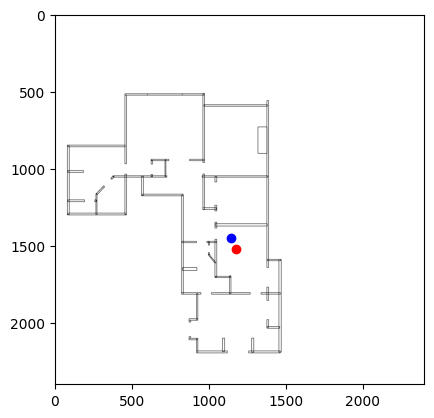

In [15]:
pos_result_pth = "E:\Workspace\Projects\iGibson\scripts/04/20231228061524.txt"
visualize_pos_result(pos_result_pth)